In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv(r'C:\Users\mansr\OneDrive\Desktop\Adnaan Projects\dataset\LoanApprovalPrediction.csv')

In [30]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
obj = (data.dtypes == 'object')
print('Categorical Variables:',len(list(obj[obj].index)))

Categorical Variables: 7


In [32]:
# As Loan ID is unique and not correlated with other columns, we can drop it

data.drop(['Loan_ID'], axis = 1, inplace = True)

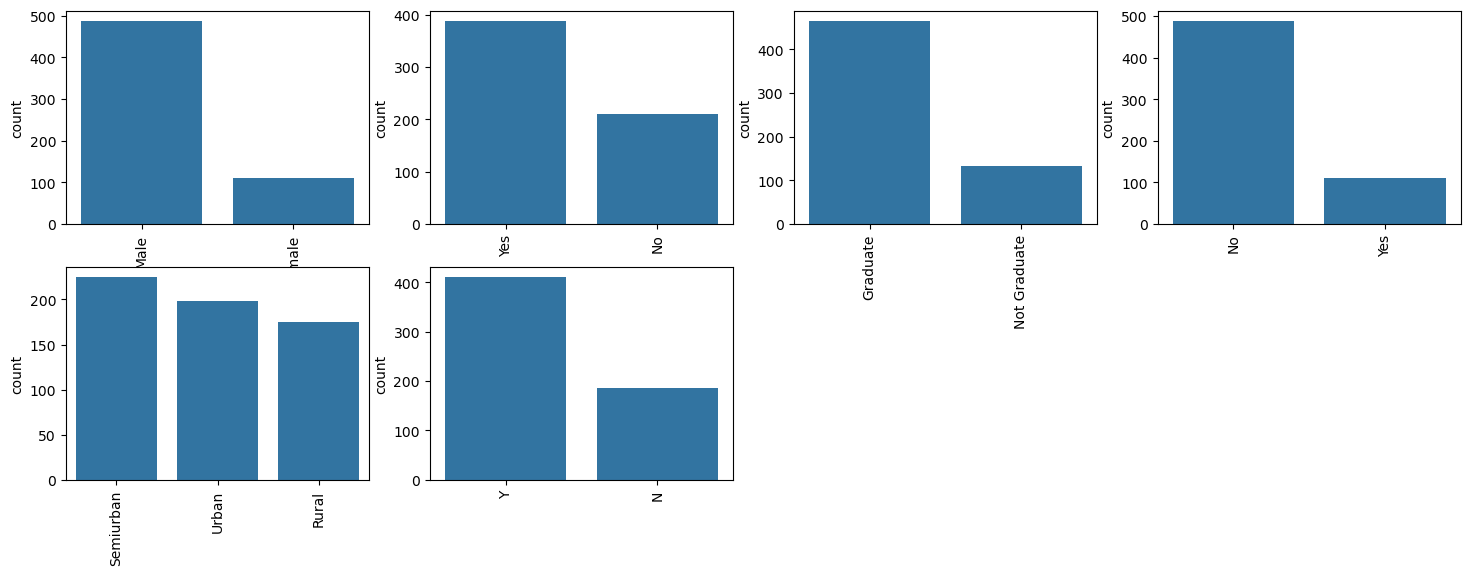

In [33]:
# Visualising all unique columns using barplot

obj = (data.dtypes == 'object')
objects_columns = list(obj[obj].index)
plt.figure(figsize = (18,36))
index = 1

for col in objects_columns:
    y = data[col].value_counts()
    plt.subplot(11 , 4, index)
    plt.xticks(rotation = 90)
    sns.barplot(x = list(y.index), y = y)
    index += 1

In [34]:
# As categorical data is binary (in most cases), we can use label encoder to convert them to int values

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')

for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])


In [35]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<Axes: >

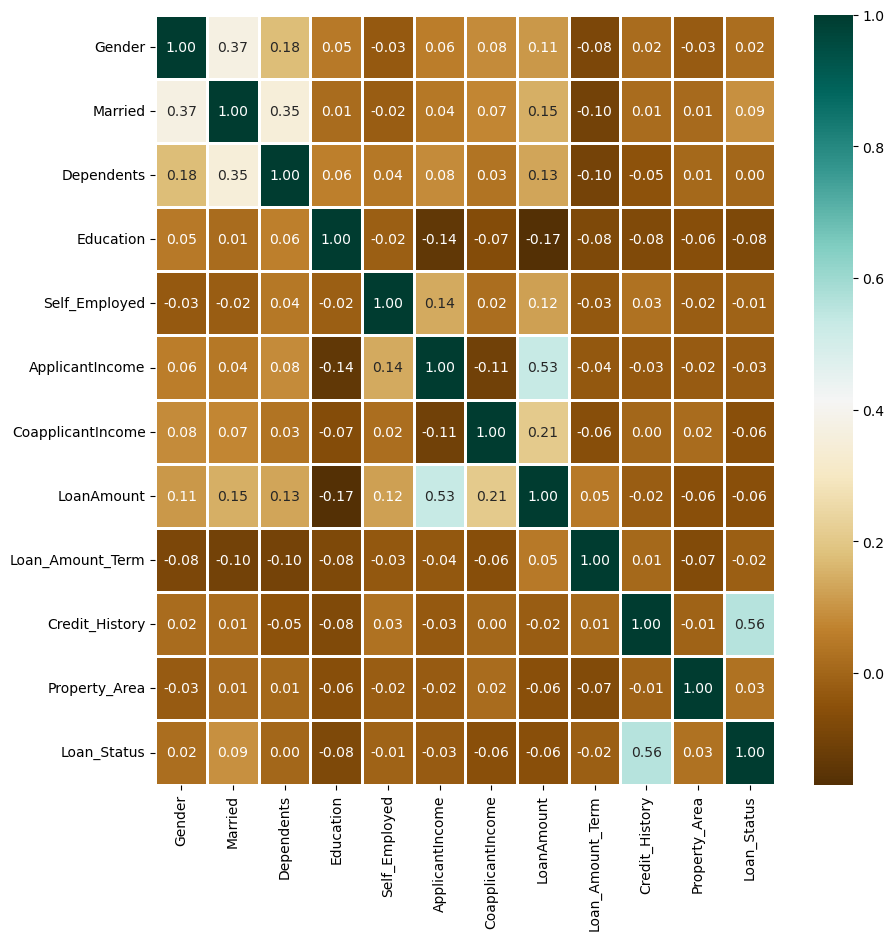

In [36]:
# Heatmap

plt.figure(figsize = (10,10))

sns.heatmap(data.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)

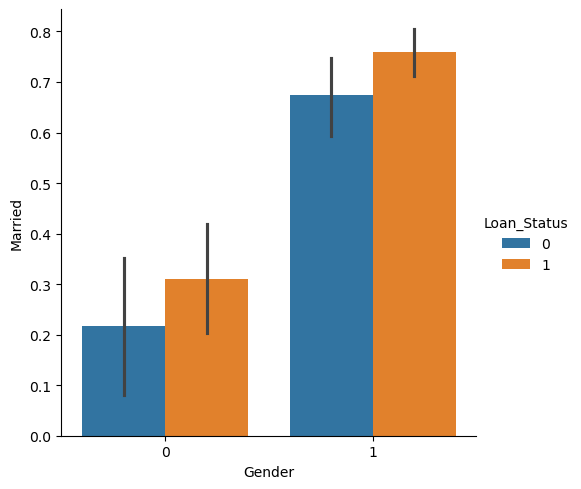

In [37]:
sns.catplot(x = 'Gender', y = 'Married', hue = 'Loan_Status', kind = 'bar', data = data)

In [53]:
# Filling NAs with mean

for col in data.columns:
    data[col] = data[col].fillna(data[col].mean)

data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'], axis = 1)
Y = data['Loan_Status']

X.shape, Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 1)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [61]:
# Converting objects to numericals and also filling NAs with mean

X_train = X_train.apply(pd.to_numeric, errors='coerce')

X_train = X_train.fillna(X_train.mean())

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 3)
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 7)
svc = SVC()
lc = LogisticRegression()

# Trying all the diff models

for clf in (knn, rfc, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print('Accuracy score of', clf.__class__.__name__, '=', 100*metrics.accuracy_score(Y_train, Y_pred))


Accuracy score of KNeighborsClassifier = 78.49162011173185
Accuracy score of RandomForestClassifier = 98.04469273743017
Accuracy score of SVC = 68.71508379888269
Accuracy score of LogisticRegression = 79.60893854748603


C:\Users\mansr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
# Converting objects to numericals and also filling NAs with mean

X_test = X_test.apply(pd.to_numeric, errors='coerce')

X_test = X_test.fillna(X_test.mean())

In [67]:
for clf in (knn, rfc, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print('Accuracy score of', clf.__class__.__name__,'=', 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of KNeighborsClassifier = 63.74999999999999
Accuracy score of RandomForestClassifier = 82.5
Accuracy score of SVC = 69.16666666666667
Accuracy score of LogisticRegression = 80.0


C:\Users\mansr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest classifier has the best accuracy